In [1]:
pwd

'/Users/palaknigam/Documents/DA89/Python Hackathon'

In [2]:
cd ../../../Desktop

/Users/palaknigam/Desktop


In [3]:
ls

2023-12-06 21.12.46 Python Hackathon Meetup/
Codepath-PH/
Exam Stress Final.xlsx
Palak  Nigam CV/
Palak Nigam CV .pdf
Palak_PH/
Palak_notebook_trial.ipynb
Screenshot 2023-12-05 at 10.50.57 PM.png
Syntax for NPM.sql
Untitled.ipynb
gap return label .pdf
liver analysis in sepsis patient.twbx
recently in use dataset/


In [19]:
ls

2023-12-06 21.12.46 Python Hackathon Meetup/
Codepath-PH/
Exam Stress Final.xlsx
Palak  Nigam CV/
Palak Nigam CV .pdf
Palak_PH/
Palak_notebook_trial.ipynb
Screenshot 2023-12-05 at 10.50.57 PM.png
Syntax for NPM.sql
Untitled.ipynb
gap return label .pdf
liver analysis in sepsis patient.twbx
recently in use dataset/
~$Exam Stress Final.xlsx


In [20]:
import pandas as pd
#Read the excel file and store the sheets into dataframes.
excelFile = pd.ExcelFile(r"Exam Stress Final.xlsx")
grades = pd.read_excel(excelFile, 'Grades')
demography = pd.read_excel(excelFile, 'Demography')
eda = pd.read_excel(excelFile, 'EDA')
hr = pd.read_excel(excelFile, 'HR')
temp = pd.read_excel(excelFile, 'Temp')
ibi = pd.read_excel(excelFile, 'IBI')

In [5]:
pwd

'/Users/palaknigam/Documents/DA89/Python Hackathon'

 33. Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows

In [4]:
# Load Excel sheets into DataFrames
import pandas as pd
eda = pd.read_excel(r"Exam Stress Final.xlsx", sheet_name='EDA', nrows=10,usecols=['EDA', 'Student_id'])
hr = pd.read_excel(r"Exam Stress Final.xlsx", sheet_name='HR', nrows=10,usecols=['HR', 'Student_id'])
temp = pd.read_excel(r"Exam Stress Final.xlsx", sheet_name='Temp', nrows = 10,usecols=['TEMP', 'Student_id'])

# # print(pd.concat([eda, hr],axis = 1))
# # combined_data = pd.concat(eda, hr, on="Student_id")
combined_data = pd.merge(eda, hr, on="Student_id")
combined_data = pd.merge(combined_data, temp, on="Student_id")
#print(combined_data)
pivot_table= pd.pivot_table(combined_data, index='Student_id',columns=['EDA','HR'],aggfunc='mean')
print(pivot_table)

               TEMP                                                        \
EDA           0.024                                                         
HR          81.178   91.792   102.488  104.077  109.852  113.454  119.023   
Student_id                                                                  
S01         21.1171  21.1171  21.1171  21.1171  21.1171  21.1171  21.1171   

                                                                           \
EDA                                      0.040                              
HR          120.983  130.879  131.586  81.178   91.792   102.488  104.077   
Student_id                                                                  
S01         21.1171  21.1171  21.1171  21.1171  21.1171  21.1171  21.1171   

                                                                  
EDA                                                               
HR          109.852  113.454  119.023  120.983  130.879  131.586  
Student_id                 

 34. Display the Student Demographics and Grades who are born in leap Year

In [78]:
import pandas as pd
# Reading demography and grades from Excel file
demography = pd.read_excel("Exam Stress Final.xlsx", sheet_name='Demography')
grades = pd.read_excel("Exam Stress Final.xlsx", sheet_name='Grades')

# I am Converting  DOB to datetime format and extract year to check for leap year
demography['DOB'] = pd.to_datetime(demography['DOB'])
demography['Leap_Year'] = demography['DOB'].dt.year.apply(lambda x: x % 4 == 0 and (x % 100 != 0 or x % 400 == 0))

# now let's filter students born in leap years
leap_year_students = demography[demography['Leap_Year']]

# now let's Merge demographics of leap year students with their grades using 'Student_id'
merged_data = pd.merge(leap_year_students, grades, on='Student_id')

# Displaying Student Demographics and Grades for Students born in leap years in table format
print("Student Demographics and Grades for Students born in leap years:")
print(merged_data.to_string(index=False))

Student Demographics and Grades for Students born in leap years:
Student_id        DOB First Name Last Name Gender    Race  Leap_Year  Midterm 1  Midterm 2  final
       S06 2008-04-04        Pat    Murray      M African       True         71         64    175


 35. Create a Bins of Grades to segregate the students in Grades  'A','B',C'

In [99]:
import pandas as pd

grades = pd.read_excel("Exam Stress Final.xlsx")
grade_bins = [-1,120,150, 200]  
grade_labels = ['C', 'B', 'A'] 
grades['Grade'] = pd.cut(grades['final'], bins=grade_bins, labels=grade_labels, right=False)
print(grades)


  Student_id  Midterm 1  Midterm 2  final Grade
0        S01         78         82    182     A
1        S02         82         85    180     A
2        S03         77         90    188     A
3        S04         75         77    149     B
4        S05         67         77    157     A
5        S06         71         64    175     A
6        S07         64         33    110     C
7        S08         92         88    184     A
8        S09         80         39    126     B
9        S10         89         64    116     C


 36. Create a Word Cloud with First name of Student Names based on thier Race 

In [9]:
pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151973 sha256=89d302b63192bef275ab2338c1938fb5c8fa4df33f8de6e558ff460d5c4ad679
  Stored in directory: /Users/palaknigam/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


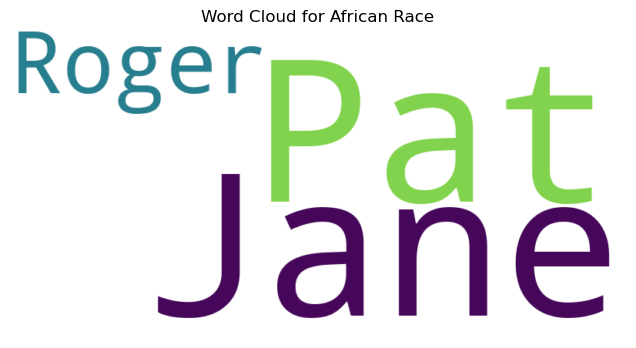

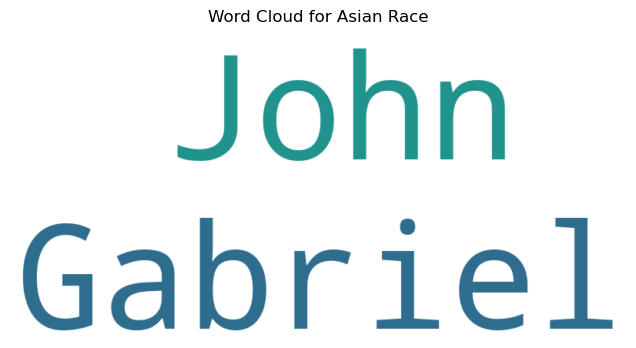

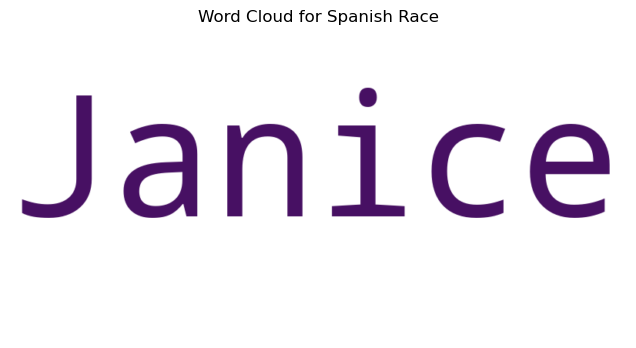

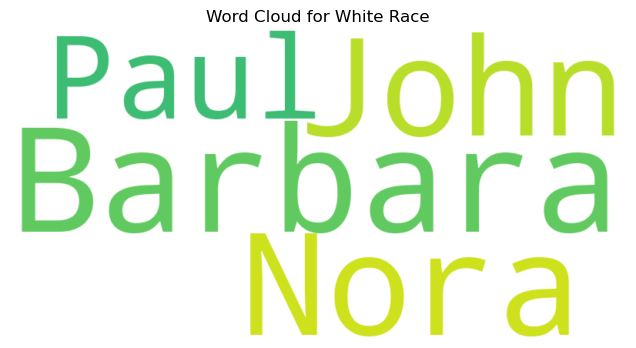

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

demographics = pd.read_excel("Exam Stress Final.xlsx", sheet_name='Demography')

race_names = demographics.groupby('Race')['First Name'].apply(lambda x: ' '.join(x)).reset_index()

for index, row in race_names.iterrows():
    race = row['Race']
    names_text = row['First Name']
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)
    

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {race} Race')
    plt.axis('off')
    plt.show()


 37. Display the student Names and respective grades who has Maximum heart rate

In [27]:
import pandas as pd

demography = pd.read_excel("Exam Stress Final.xlsx", sheet_name='Demography')

Grades = pd.read_excel("Exam Stress Final.xlsx", sheet_name='Grades')

HR = pd.read_excel("Exam Stress Final.xlsx", sheet_name='HR')

#Calculating the  average heart rate for each student

avg_HR = HR.groupby('Student_id')['HR'].mean().reset_index()

max_HR_student = avg_HR.loc[avg_HR['HR'].idxmax()]

student_info = demography.merge(Grades, on='Student_id')


result = student_info[student_info['Student_id'] == max_HR_student['Student_id']]
print(result[['First Name', 'Last Name', 'Midterm 1', 'Midterm 2', 'final']])


  First Name Last Name  Midterm 1  Midterm 2  final
1       Nora     Jones         82         85    180


# 38. Write a Python program to get the number of occurrences of a specified element in the array.

# 39. Create a 3D list using nested for loops.

# 40. "Array = [ [1, 2, 3], [4, 5, 6], [7, 8, 9]] Display each row of this array as a separate slice"

# 41. Find the Student name and the Exam who has the Temprature '36.042'

# 42. Using arrays and loops, find the count of students based on gender.

# 43. Generate Unique Student ID  using Lamda Function.

# 44. Create a Box  plot for HR and Temp

# 45. Find the student's Max mean EDA who are attending Final 

# 46. Find the Grade of a Student whose Name ends with 'S'

# 47. Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)

# 48. Find the Full Name of the student who has Max HR